In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Daten einlesen
r_3d,v_r,v_t,mv,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,21,30,31,32,33,34,35,36,37,38), unpack=True)


In [60]:
#Definitionen von allem

stars=len(r_3d)
bin_num=50
spb=stars/bin_num+1

r0=0.2
step=20
end=100
r=np.logspace(np.log10(r0),np.log10(end),step+1)
r_i=r[:-1:]
r_a=r[1::]

#fuer velocity dispersion
sigrad_r3d=np.zeros(bin_num)
sigtheta_r3d=np.zeros(bin_num)
sigphi_r3d=np.zeros(bin_num)

#fuer Fehlerbalken
sigraderr=np.zeros(bin_num)
sigthetaerr=np.zeros(bin_num)
sigphierr=np.zeros(bin_num)

#fuer mean velocities
meanrad_r3d=np.zeros(bin_num)
meantheta_r3d=np.zeros(bin_num)
meanphi_r3d=np.zeros(bin_num)

beta=np.zeros(bin_num)

R=np.zeros(bin_num)
Rerr=np.zeros(bin_num)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in double_scalars


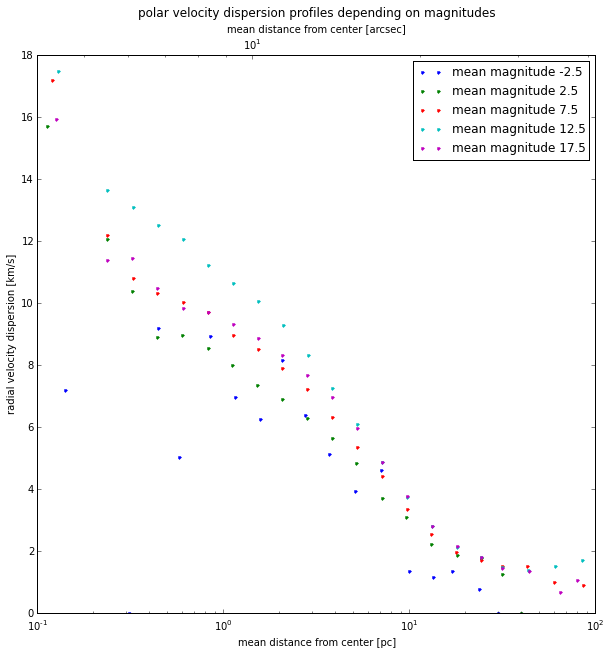

In [62]:
#berechne Standardabweichung der rad. vel. in Bins mit immer gleichen Anzahl an Sternen und die durchschnittliche Entfernung
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax3 = fig.add_subplot(111)

for k in range(-5,20,5):   
    inplot=(k<=mv)*(mv<=k+5)
    for n in range(step):
        inbin=(r_i[n]<r_3d) * (r_3d<=r_a[n]) 
        R[n]=np.mean(r_3d[inplot*inbin]) #berechnet mittlere Entfernung der Sterne in einem bin
        Rerr[n]=stats.sem(R[n],ddof=0)
        sigrad_r3d[n]=np.std(vr[inplot*inbin]) #vel disp Wert der neuen radial velocity
        sigtheta_r3d[n]=np.std(vtheta[inplot*inbin]) #vel disp Wert der theta velocity
        sigphi_r3d[n]=np.std(vphi[inplot*inbin]) #vel disp Wert der phi velocity
        sigraderr[n]=sigrad_r3d[n]/np.sqrt(2*np.sum(inplot*inbin)) #Fehler der radialen Standardabweichung
        sigthetaerr[n]=sigtheta_r3d[n]/np.sqrt(2*np.sum(inplot*inbin)) #Fehler der azimuthalen Standardabweichung
        sigphierr[n]=sigphi_r3d[n]/np.sqrt(2*np.sum(inplot*inbin)) #Fehler der polaren Standardabweichung
        meanrad_r3d[n]=np.mean(vr[inplot*inbin]) #mean Wert der neuen radial velocity
        meantheta_r3d[n]=np.mean(vtheta[inplot*inbin]) #mean Wert der theta velocity
        meanphi_r3d[n]=np.mean(vphi[inplot*inbin]) #mean Wert der phi velocity
        beta[n]=1-(sigtheta_r3d[n]**2+sigphi_r3d[n]**2)/(2*sigrad_r3d[n]**2) #anisotropy parameter beta
        #print(len(r_3d[n*spb+1:(n+1)*spb+1]),R[n])
        
    #extrabin am anfang
    sigrad_r3dxtr=np.std(vr[(r_3d<r0)*inplot])
    sigphi_r3dxtr=np.std(vphi[(r_3d<r0)*inplot])
    R_extra=np.mean(r_3d[(r_3d<r0)*inplot])
    #einfuegen in bereits angefertigte arrays an erster Stelle
    sigrad_r3dfinal=np.insert(sigrad_r3d,0,sigrad_r3dxtr)
    sigphi_r3dfinal=np.insert(sigphi_r3d,0,sigphi_r3dxtr)
    R_final=np.insert(R,0,R_extra)

        
    lab='mean magnitude '+str(k+2.5) #label for legend, showing mean magnitude
    ax1.semilogx(R_final,sigphi_r3dfinal,'.',label=lab)
    ax1.legend()
    #ax1.set_xlim(0.1,1) 
    ax1.set_xlabel('mean distance from center [pc]')
    ax1.set_ylabel('radial velocity dispersion [km/s]')

    ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(1./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
    ax2.set_xscale('log')
    ax2.set_xlabel('mean distance from center [arcsec]')

    ax2.set_title('polar velocity dispersion profiles depending on magnitudes',y=1.06) 


plt.show()
#fig.savefig('Plots/polar velcoity dispersion profile depending on magnitudes')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


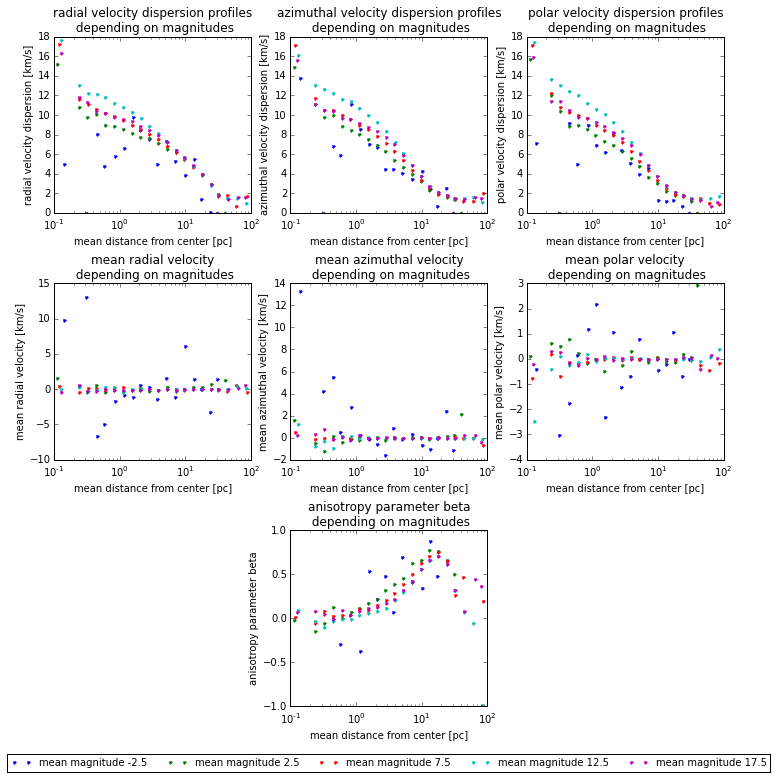

In [92]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))

for k in range(-5,20,5):   
    inplot=(k<=mv)*(mv<=k+5)
    for n in range(step):
        inbin=(r_i[n]<r_3d) * (r_3d<=r_a[n]) 
        R[n]=np.mean(r_3d[inplot*inbin]) #berechnet mittlere Entfernung der Sterne in einem bin
        Rerr[n]=stats.sem(R[n],ddof=0)
        sigrad_r3d[n]=np.std(vr[inplot*inbin]) #vel disp Wert der neuen radial velocity
        sigtheta_r3d[n]=np.std(vtheta[inplot*inbin]) #vel disp Wert der theta velocity
        sigphi_r3d[n]=np.std(vphi[inplot*inbin]) #vel disp Wert der phi velocity
        sigraderr[n]=sigrad_r3d[n]/np.sqrt(2*np.sum(inplot*inbin)) #Fehler der radialen Standardabweichung
        sigthetaerr[n]=sigtheta_r3d[n]/np.sqrt(2*np.sum(inplot*inbin)) #Fehler der azimuthalen Standardabweichung
        sigphierr[n]=sigphi_r3d[n]/np.sqrt(2*np.sum(inplot*inbin)) #Fehler der polaren Standardabweichung
        meanrad_r3d[n]=np.mean(vr[inplot*inbin]) #mean Wert der neuen radial velocity
        meantheta_r3d[n]=np.mean(vtheta[inplot*inbin]) #mean Wert der theta velocity
        meanphi_r3d[n]=np.mean(vphi[inplot*inbin]) #mean Wert der phi velocity
        beta[n]=1-(sigtheta_r3d[n]**2+sigphi_r3d[n]**2)/(2*sigrad_r3d[n]**2) #anisotropy parameter beta
        
    #extrabin am anfang
    sigrad_r3dxtr=np.std(vr[(r_3d<r0)*inplot])
    sigtheta_r3dxtr=np.std(vtheta[(r_3d<r0)*inplot])
    sigphi_r3dxtr=np.std(vphi[(r_3d<r0)*inplot])
    meanradxtr=np.mean(vr[(r_3d<r0)*inplot])
    meanthetaxtr=np.mean(vtheta[(r_3d<r0)*inplot])
    meanphixtr=np.mean(vphi[(r_3d<r0)*inplot])
    betaxtr=1-(sigtheta_r3dxtr**2+sigphi_r3dxtr**2)/(2*sigrad_r3dxtr**2)
    R_extra=np.mean(r_3d[(r_3d<r0)*inplot])
    #einfuegen in bereits angefertigte arrays an erster Stelle
    sigrad_r3dfinal=np.insert(sigrad_r3d,0,sigrad_r3dxtr)
    sigtheta_r3dfinal=np.insert(sigtheta_r3d,0,sigtheta_r3dxtr)
    sigphi_r3dfinal=np.insert(sigphi_r3d,0,sigphi_r3dxtr)
    meanrad_r3dfinal=np.insert(meanrad_r3d,0,meanradxtr)
    meantheta_r3dfinal=np.insert(meantheta_r3d,0,meanthetaxtr)
    meanphi_r3dfinal=np.insert(meanphi_r3d,0,meanphixtr)
    beta_final=np.insert(beta,0,betaxtr)
    R_final=np.insert(R,0,R_extra)
    
    lab='mean magnitude '+str(k+2.5) #label for legend, showing mean magnitude
    
    axes[0,0].semilogx(R_final,sigrad_r3dfinal,'.', label=lab)
    axes[0,0].set_xlabel('mean distance from center [pc]')
    axes[0,0].set_ylabel('radial velocity dispersion [km/s]')
    axes[0,0].set_title('radial velocity dispersion profiles \n depending on magnitudes') 

    axes[0,1].semilogx(R_final,sigtheta_r3dfinal,'.', label=lab)
    axes[0,1].set_xlabel('mean distance from center [pc]')
    axes[0,1].set_ylabel('azimuthal velocity dispersion [km/s]')
    axes[0,1].set_title('azimuthal velocity dispersion profiles \n depending on magnitudes') 

    axes[0,2].semilogx(R_final,sigphi_r3dfinal,'.', label=lab)
    axes[0,2].set_xlabel('mean distance from center [pc]')
    axes[0,2].set_ylabel('polar velocity dispersion [km/s]')
    axes[0,2].set_title('polar velocity dispersion profiles \n depending on magnitudes') 
    
    axes[1,0].semilogx(R_final,meanrad_r3dfinal,'.', label=lab)
    axes[1,0].set_xlabel('mean distance from center [pc]')
    axes[1,0].set_ylabel('mean radial velocity [km/s]')
    axes[1,0].set_title('mean radial velocity \n depending on magnitudes') 
    
    axes[1,1].semilogx(R_final,meantheta_r3dfinal,'.', label=lab)
#    axes[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.3),ncol=5,prop={'size':10})
    axes[1,1].set_xlabel('mean distance from center [pc]')
    axes[1,1].set_ylabel('mean azimuthal velocity [km/s]')
    axes[1,1].set_title('mean azimuthal velocity \n depending on magnitudes') 
    
    axes[1,2].semilogx(R_final,meanphi_r3dfinal,'.', label=lab)
    axes[1,2].set_xlabel('mean distance from center [pc]')
    axes[1,2].set_ylabel('mean polar velocity [km/s]')
    axes[1,2].set_title('mean polar velocity \n depending on magnitudes') 
    
    axes[2,1].semilogx(R_final,beta_final,'.',label=lab) 
    axes[2,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.4),ncol=5,prop={'size':10})
    axes[2,1].set_xlabel('mean distance from center [pc]')
    axes[2,1].set_ylabel('anisotropy parameter beta')
    axes[2,1].set_title('anisotropy parameter beta \n depending on magnitudes')
    axes[2,1].set_ylim(-1,1)

    axes[2,0].axis('off')
    axes[2,2].axis('off')
    
fig.subplots_adjust(hspace=0.4)
fig.savefig('Plots/velocity dispersion mean velocity profiles and beta parameter depending on magnitudes')